## Display Post Stamps

Author: Shu Liu

Last Edited date: 06/17/2020

Abstract

This notebook shows how to display poststamps of difference image, calexp image, and deepCoadd image at the same position.

In [30]:
import matplotlib.pyplot as plt

import lsst.afw.display as afwDisplay
from lsst.afw.math import Warper
import lsst.afw.geom as afwGeom
from lsst.daf.persistence import Butler
from lsst.geom import SpherePoint
import lsst.geom as geom

In [15]:
tract, patch, filt = 4639, '0,0', 'r'
visit, detector = 181868, 57
calexp_id = {'visit': visit, 'detector': detector, 'filter': filt}
deepCoadd_id = {'tract': tract, 'patch': patch, 'filter': filt}

diff_repo = '/global/homes/s/shl159/GitHub/al_test'
calexp_repo = '/global/cscratch1/sd/desc/DC2/data/Run2.1i/rerun/calexp-v1'
deepCoadd_repo = '/global/cscratch1/sd/desc/DC2/data/Run2.1i/rerun/coadd-dr1b-v1-grizy'
data_id = {'visit': visit, 'detector': detector, 'filter': filt, 'tract': tract, 'patch': patch}

In [16]:
diff_butler = Butler(diff_repo)
calexp_butler = Butler(calexp_repo)
deepCoadd_butler = Butler(deepCoadd_repo)

In [53]:
def make_cutout(exposure, x, y, cutout_size=60):
    # Make a cutout exposure at (x, y).
    cutout_extent = geom.ExtentI(cutout_size, cutout_size)
    radec = geom.SpherePoint(exposure.getWcs().pixelToSky(x, y))
    cutout_image = exposure.getCutout(radec, cutout_extent)
    return cutout_image


def display_cutout(cutout_image, x, y, scale=None, frame=None, title=None, show_mask_name=False, save_name=None):
    # Display the cutout image.
    
    # xy = geom.Point2I(x, y)
    # Call to deprecated function (or staticmethod) Point2I.
    # (Replaced by lsst.geom.PointI (will be removed before the release of v20.0))
    xy = geom.PointI(x, y)
    display = afwDisplay.Display(frame=frame, backend='matplotlib')
    if scale:
        display.scale("linear", scale[0], scale[1])
        
    else:
        display.scale("linear", "zscale")
    display.mtv(cutout_image)
    display.dot('o', xy.getX(), xy.getY(), ctype='red')
    display.show_colorbar()
    plt.title(title)
    
    if show_mask_name:
        print(title)
        mask = cutout_image.getMask()
        for maskName, maskBit in mask.getMaskPlaneDict().items():
            print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)), end=' ')
        print('\n')
        
    if save_name:
        plt.savefig(save_name, dpi=500)
    
def display_xy(exposure, x, y, cutout_size=60, scale=None, frame=None, title=None,
               show_mask_name=False, save_name=None):
    cutout = make_cutout(exposure, x, y, cutout_size=cutout_size)
    display_cutout(cutout, x, y, scale=scale, frame=frame, title=title,
                    show_mask_name=show_mask_name, save_name=save_name)
    
def warp_to_exposure(exposure, warp_to_exposure):
    warper = Warper(warpingKernelName='lanczos4')
    exposure_warped = warper.warpExposure(warp_to_exposure.getWcs(), exposure,
                                          destBBox=warp_to_exposure.getBBox())
    return exposure_warped

def get_mask_name(exposure):
    mask = exposure.getMask()
    for maskName, maskBit in mask.getMaskPlaneDict().items():
        print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)))
        
def display_exposures(x, y, diff_butler, calexp_butler, deepCoadd_butler,
                      calexp_id, deepCoadd_id, cutout_size=60, scale=None,
                      show_mask_name=False):
    diff_exposure = diff_butler.get('deepDiff_differenceExp', calexp_id)
    calexp_exposure = calexp_butler.get('calexp', calexp_id)
    deepCoadd_exposure = deepCoadd_butler.get('deepCoadd',  deepCoadd_id)
    
    deepCoadd_warped = warp_to_exposure(deepCoadd_exposure, calexp_exposure)
    
    # calexp_xy = geom.Point2I(x, y)
    # Call to deprecated function (or staticmethod) Point2I.
    # (Replaced by lsst.geom.PointI (will be removed before the release of v20.0))
    calexp_xy = geom.PointI(x, y)
    calexp_radec = geom.SpherePoint(calexp_exposure.getWcs().pixelToSky(x, y))
    
    deepCoadd_xy = afwGeom.PointI(deepCoadd_warped.getWcs().skyToPixel(calexp_radec))
    
    deepCoadd_x, deepCoadd_y = deepCoadd_xy.getX(), deepCoadd_xy.getY()
    
    display_xy(diff_exposure, x, y, cutout_size=60, scale=None, frame=10001, title='diff',
                show_mask_name=show_mask_name, save_name=None)
    display_xy(calexp_exposure, x, y, cutout_size=60, scale=None, frame=10002, title='calexp',
               show_mask_name=show_mask_name, save_name=None)
    display_xy(deepCoadd_warped, deepCoadd_x, deepCoadd_y, cutout_size=60,
               scale=None, frame=10003, title='deepCoadd',
               show_mask_name=show_mask_name, save_name=None)
        
    

In [33]:
repo_20_180  = '/global/cfs/cdirs/desc-sn/dia/data/shl159/fake_injection/fake_data/fake_offset_25_poisson/fake_20_offset/al_20_180_offset'

diff_20_180_buter = Butler(repo_20_180)
calexp_20_180_buter = Butler('/global/cfs/cdirs/desc-sn/dia/data/shl159/fake_injection/fake_data/fake_offset_25_poisson/fake_20_offset/fake_20_180_offset/')

template_repo = '/global/cscratch1/sd/desc/DC2/data/Run2.1i/rerun/coadd-dr1b-v1-grizy'
template_butler = Butler(template_repo)

In [35]:
x, y = (3379.0266095404404, 2267.0741260852787)

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:69: FutureWarning: Call to deprecated function (or staticmethod) Point2I. (Replaced by lsst.geom.PointI (will be removed before the release of v20.0))


diff
BAD: red BRIGHT_OBJECT: None CLIPPED: None CR: magenta CROSSTALK: None DETECTED: blue DETECTED_NEGATIVE: cyan EDGE: yellow FAKE: None INEXACT_PSF: None INTRP: green NOT_DEBLENDED: None NO_DATA: orange REJECTED: None SAT: green SENSOR_EDGE: None SUSPECT: yellow UNMASKEDNAN: None 

calexp
BAD: red BRIGHT_OBJECT: None CLIPPED: None CR: magenta CROSSTALK: None DETECTED: blue DETECTED_NEGATIVE: cyan EDGE: yellow FAKE: None INEXACT_PSF: None INTRP: green NOT_DEBLENDED: None NO_DATA: orange REJECTED: None SAT: green SENSOR_EDGE: None SUSPECT: yellow UNMASKEDNAN: None 



/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/colorbar.py:1042: RuntimeWarning: divide by zero encountered in true_divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db


deepCoadd
BAD: red BRIGHT_OBJECT: None CLIPPED: None CR: magenta CROSSTALK: None DETECTED: blue DETECTED_NEGATIVE: cyan EDGE: yellow FAKE: None INEXACT_PSF: None INTRP: green NOT_DEBLENDED: None NO_DATA: orange REJECTED: None SAT: green SENSOR_EDGE: None SUSPECT: yellow UNMASKEDNAN: None 



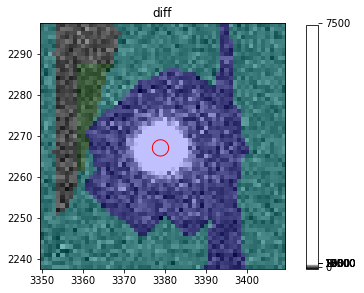

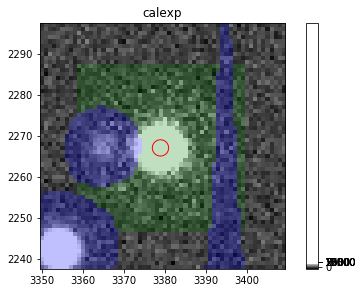

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


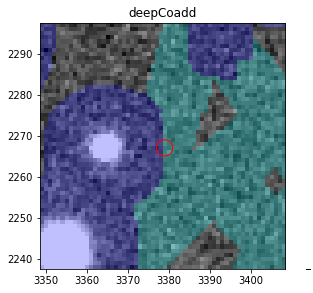

In [54]:
display_exposures(x, y, diff_20_180_buter, calexp_20_180_buter, template_butler,
                  calexp_id, deepCoadd_id, show_mask_name=True)

In [ ]:
def cutout_ra_dec(butler, data_id, ra, dec, dataset_type='deepDiff_differenceExp',
                  cutout_size=75, warp_to_exposure=None, **kwargs):
    """
    Produce a cutout from dataset_type from the given butler at the given ra, dec
    
    Notes
    -----
    Trivial wrapper around 'cutout_spherepoint'
    
    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Loaded DM Butler providing access to a data repository
    data_id: Butler data ID
        E.g., {'visit': 1181556, 'detector': 45, 'filter': 'r'}
    ra: float
        Right ascension of the center of the cutout, degrees
    dec: float
        Declination of the center of the cutout, degrees
    cutout_size: int [optional] 
        Side of the cutout region in pixels.  Region will be cutout_size x cutout_size.
    warp_to_exposure: optional
        Warp coadd to system of specified 'exposure', e.g., the visit image, to warp the coadd to
        before making the cutout.  The goal is to that a cut out of a coadd image
        and a cutout of a visit image should line up.
        'warp_to_exposure' overrides setting of 'cutout_size'.
         
    Returns
    -------
    MaskedImage
    """
    cutout_extent = afwGeom.ExtentI(cutout_size, cutout_size)
    radec = SpherePoint(ra, dec, afwGeom.degrees)
   
    image = butler.get(dataset_type, dataId=data_id)

    xy = afwGeom.PointI(image.getWcs().skyToPixel(radec))
    bbox = afwGeom.BoxI(xy - cutout_extent//2, cutout_extent)
    
    if warp_to_exposure is not None:
        warper = Warper(warpingKernelName='lanczos4')
        cutout_image = warper.warpExposure(warp_to_exposure.getWcs(), image,
                                           destBBox=warp_to_exposure.getBBox())
    else:
        cutout_image = image.getCutout(radec, cutout_extent)
    
    return cutout_image


def make_cutout_image(butler, data_id, ra, dec,
                      title=None,
                      frame=None, display=None, backend='matplotlib',
                      show=True, saveplot=False, savefits=False,
                      zscale=None,
                      dataset_type='deepCoadd',
                      **kwargs):
    """
    Generate and optionally display and save a postage stamp for a given RA, Dec.
    
    Parameters
    ----------
    butler: lsst.daf.persistence.Butler
        Servant providing access to a data repository
    data_id:
        DM Butler Data Id
    ra: float
        Right ascension of the center of the cutout, degrees
    dec: float
        Declination of the center of the cutout, degrees
    filter: string 
        Filter of the image to load
    Returns
    -------
    MaskedImage

    Notes
    -----
    Uses lsst.afw.display with matplotlib to generate stamps.  Saves FITS file if requested.
    """
    cutout_image = cutout_ra_dec(butler, data_id, ra, dec, dataset_type=dataset_type, **kwargs)
    
    if savefits:
        if isinstance(savefits, str):
            filename = savefits
        else:
            filename = 'postage-stamp.fits'
        cutout_image.writeFits(filename)
    
    radec = SpherePoint(ra, dec, afwGeom.degrees)
    xy = cutout_image.getWcs().skyToPixel(radec)
    
    if display is None:
        display = afwDisplay.Display(frame=frame, backend=backend)

    display.mtv(cutout_image)
    display.scale("linear", "zscale")
    display.dot('o', xy.getX(), xy.getY(), ctype='red')
    display.show_colorbar()

    plt.xlabel('x')
    plt.ylabel('y')
    if title is not None:
        plt.title(title)

    if saveplot:
        if isinstance(saveplot, str):
            filename = saveplot
        else:
            filename = 'postage-stamp.png'
        plt.savefig(filename)
    if show:
        plt.show()

    return cutout_image